# Unit-aware computations with ``brainunit``

[![Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/chaobrain/brain-modeling-ecosystem/blob/main/docs/basics/brainunit_unit_aware_computations.ipynb)
[![Open in Kaggle](https://kaggle.com/static/images/open-in-kaggle.svg)](https://kaggle.com/kernels/welcome?src=https://github.com/chaobrain/brain-modeling-ecosystem/blob/main/docs/basics/brainunit_unit_aware_computations.ipynb)

Welcome! This tutorial introduces ``brainunit``, the physical units and unit-aware mathematical system in the BrainX ecosystem.

## Why Physical Units?

**Brain models involve many physical quantities:**
- Time (milliseconds, seconds)
- Voltage (millivolts)
- Current (nanoamperes, microamperes)
- Conductance (nanosiemens, microsiemens)
- Capacitance (picofarads)
- Resistance (megaohms)

**Problems without unit tracking:**
- Mixing incompatible units (adding voltage and current)
- Forgetting to convert units (using seconds instead of milliseconds)
- Hard-to-debug errors from dimensionally incorrect equations

**Benefits of ``brainunit``:**
- Automatic dimension checking prevents errors
- Clear, self-documenting code
- Seamless unit conversions
- JAX-compatible for GPU/TPU acceleration

In [50]:
# Imports
import brainunit as u
import jax.numpy as jnp
import numpy as np
import matplotlib.pyplot as plt

## Creating Quantities with Units

A **quantity** combines a numerical value with a physical unit.
In ``brainunit``, multiply values by unit constants:

In [51]:
# Time quantities
t1 = 10.0 * u.ms  # 10 milliseconds
t2 = 0.01 * u.second  # 0.01 seconds
t3 = 1.5 * u.us  # 1.5 microseconds

print("t1 =", t1)
print("t2 =", t2)
print("t3 =", t3)

t1 = 10. * msecond
t2 = 0.01 * second
t3 = 1.5 * usecond


In [52]:
# Voltage quantities
V_rest = -70.0 * u.mV
V_thresh = -50.0 * u.mV
V_spike = 40.0 * u.mV

print("\nNeuron voltages:")
print("V_rest =", V_rest)
print("V_thresh =", V_thresh)
print("V_spike =", V_spike)


Neuron voltages:
V_rest = -70. * mvolt
V_thresh = -50. * mvolt
V_spike = 40. * mvolt


In [53]:
# Current and conductance
I_app = 200.0 * u.pA  # applied current in picoamperes
g_leak = 10.0 * u.nS  # leak conductance in nanosiemens
C_m = 100.0 * u.pF    # membrane capacitance in picofarads

print("\nCircuit parameters:")
print("I_app =", I_app)
print("g_leak =", g_leak)
print("C_m =", C_m)


Circuit parameters:
I_app = 200. * pamp
g_leak = 10. * nsiemens
C_m = 100. * pfarad


### Common Units in Neuroscience

**Time:** `u.second`, `u.ms` (millisecond), `u.us` (microsecond)

**Voltage:** `u.volt`, `u.mV` (millivolt)

**Current:** `u.amp`, `u.mA` (milliampere), `u.uA` (microampere), `u.nA` (nanoampere), `u.pA` (picoampere)

**Conductance:** `u.siemens`, `u.mS` (millisiemens), `u.uS` (microsiemens), `u.nS` (nanosiemens)

**Capacitance:** `u.farad`, `u.uF` (microfarad), `u.nF` (nanofarad), `u.pF` (picofarad)

**Resistance:** `u.ohm`, `u.kohm` (kiloohm), `u.Mohm` (megaohm)

**Frequency:** `u.Hz` (hertz), `u.kHz` (kilohertz)

## Unit Arithmetic

``brainunit`` automatically checks dimensional consistency and propagates units through calculations.

In [54]:
# Addition and subtraction: units must match
V1 = -70.0 * u.mV
V2 = -50.0 * u.mV
delta_V = V2 - V1
print("delta_V =", delta_V)  # 20.0 mV


delta_V = 20. * mvolt


In [55]:

# Multiplication and division: units combine
I = 100.0 * u.pA
R = 200.0 * u.Mohm
V = I * R
print("\nV = I * R =", V)  # Voltage in appropriate units



V = I * R = 20000. * uvolt


In [56]:

# Division produces new units
g = I / V1  # conductance = current / voltage
print("g = I / V =", g)

g = I / V = -1.4285715 * nsiemens


In [57]:
# Time constant: tau = R * C
R_m = 100.0 * u.Mohm
C_m = 100.0 * u.pF
tau_m = R_m * C_m
print("\ntau_m = R_m * C_m =", tau_m)


tau_m = R_m * C_m = 10000. * usecond


### Automatic Dimension Checking

``brainunit`` prevents dimensionally incorrect operations:

In [58]:
# This will work: same dimensions
V_total = (-70.0 * u.mV) + (20.0 * u.mV)
print("Valid: V_total =", V_total)

Valid: V_total = -50. * mvolt


In [59]:
# This will raise an error: incompatible dimensions
try:
    bad_sum = (100.0 * u.mV) + (50.0 * u.ms)  # voltage + time!
except Exception as e:
    print("\nError caught:", type(e).__name__)
    print("Message:", str(e)[:100], "...")


Error caught: UnitMismatchError
Message: Cannot calculate 
100.0 * mvolt + 50.0 * msecond, because units do not match: mV != ms ...


In [60]:
# This will also raise an error: incompatible units
try:
    bad_sum2 = (10.0 * u.mV) + (5.0 * u.mA)  # voltage + current!
except Exception as e:
    print("\nError caught:", type(e).__name__)
    print("Message:", str(e)[:100], "...")


Error caught: UnitMismatchError
Message: Cannot calculate 
10.0 * mvolt + 5.0 * mamp, because units do not match: mV != mA ...


## Unit Conversions

Convert quantities between compatible units using ``.to()`` method:

In [61]:
# Time conversions
t_ms = 100.0 * u.ms
t_s = t_ms.to(u.second)
t_us = t_ms.to(u.us)

print("Time conversions:")
print(f"  {t_ms} = {t_s} = {t_us}")

Time conversions:
  100.0 * msecond = 0.1 * second = 100000.00000000001 * usecond


In [62]:
# Voltage conversions
V_mv = -70.0 * u.mV
V_v = V_mv.to(u.volt)

print("\nVoltage conversions:")
print(f"  {V_mv} = {V_v}")


Voltage conversions:
  -70.0 * mvolt = -0.07 * volt


In [63]:
# Current conversions
I_pa = 200.0 * u.pA
I_na = I_pa.to(u.nA)
I_ua = I_pa.to(u.uA)

print("\nCurrent conversions:")
print(f"  {I_pa} = {I_na} = {I_ua}")


Current conversions:
  200.0 * pamp = 0.2 * namp = 0.00019999999999999998 * uamp


In [64]:
# Automatic conversion in compatible operations
t1 = 10.0 * u.ms
t2 = 0.01 * u.second
t_sum = t1 + t2  # automatically handles different units
print("\nAutomatic conversion:")
print(f"  {t1} + {t2} = {t_sum}")


Automatic conversion:
  10.0 * msecond + 0.01 * second = 20.0 * msecond


## Working with Arrays

``brainunit`` seamlessly works with NumPy and JAX arrays:

In [65]:
# Create array quantities
voltages = np.array([-70.0, -60.0, -50.0, -40.0, -30.0]) * u.mV
print("Voltages array:", voltages)
print("Shape:", voltages.shape)
print("Unit:", voltages.unit)

Voltages array: ArrayImpl([-70., -60., -50., -40., -30.], dtype=float32) * mvolt
Shape: (5,)
Unit: mV


In [66]:
# Array operations preserve units
V_mean = u.math.mean(voltages)
V_std = u.math.std(voltages)
print("\nStatistics:")
print("  Mean:", V_mean)
print("  Std:", V_std)


Statistics:
  Mean: -50. * mvolt
  Std: 14.142136 * mvolt


In [67]:
# Element-wise operations
V_shifted = voltages + 10.0 * u.mV
print("\nShifted voltages:", V_shifted)


Shifted voltages: ArrayImpl([-60., -50., -40., -30., -20.], dtype=float32) * mvolt


In [68]:
# Time arrays for simulation
dt = 0.1 * u.ms
t_end = 100.0 * u.ms
n_steps = int(t_end / dt)
time = np.arange(n_steps) * dt
print("\nTime array:")
print("  Length:", len(time))
print("  First 5 points:", time[:5])
print("  Last point:", time[-1])


Time array:
  Length: 1000
  First 5 points: ArrayImpl([0. , 0.1, 0.2, 0.30000001, 0.40000001], dtype=float32) * msecond
  Last point: 99.9 * msecond


## Mathematical Functions

Use ``u.math`` for unit-aware mathematical operations:

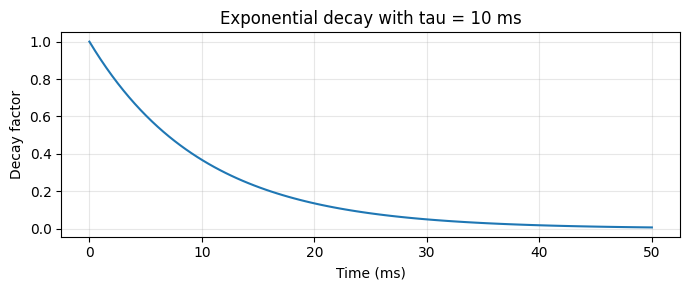

In [69]:
# Exponential decay (dimensionless exponent)
tau = 10.0 * u.ms
t = np.linspace(0, 50, 100) * u.ms
decay = u.math.exp(-t / tau)  # t/tau is dimensionless

plt.figure(figsize=(7, 3))
plt.plot(t, decay)
plt.xlabel('Time (ms)')
plt.ylabel('Decay factor')
plt.title('Exponential decay with tau = 10 ms')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

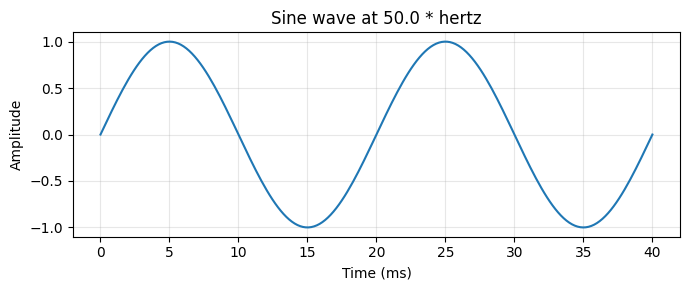

In [70]:
# Trigonometric functions (require dimensionless or angular units)
frequency = 50.0 * u.Hz
t = np.linspace(0, 40, 200) * u.ms
phase = 2 * np.pi * frequency * t  # dimensionless phase
signal = u.math.sin(phase)

plt.figure(figsize=(7, 3))
plt.plot(t, signal)
plt.xlabel('Time (ms)')
plt.ylabel('Amplitude')
plt.title(f'Sine wave at {frequency}')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## Practical Example: RC Circuit Dynamics

Let's model a simple RC circuit representing a passive neuron membrane.

The membrane voltage follows:
$\tau_m \frac{dV}{dt} = -(V - V_{rest}) + R_m I_{app}$

where:
- $\tau_m = R_m C_m$ is the membrane time constant
- $R_m$ is membrane resistance
- $C_m$ is membrane capacitance
- $I_{app}$ is applied current

In [71]:
# Membrane parameters
R_m = 100.0 * u.Mohm
C_m = 100.0 * u.pF
tau_m = R_m * C_m
V_rest = -70.0 * u.mV

print("Membrane parameters:")
print(f"  R_m = {R_m}")
print(f"  C_m = {C_m}")
print(f"  tau_m = {tau_m.to(u.ms)}")
print(f"  V_rest = {V_rest}")

Membrane parameters:
  R_m = 100.0 * Mohm
  C_m = 100.0 * pfarad
  tau_m = 10.0 * msecond
  V_rest = -70.0 * mvolt


In [72]:
# Simulation parameters
dt = 0.1 * u.ms
t_end = 50.0 * u.ms
n_steps = int(t_end / dt)
time = np.arange(n_steps) * dt

# Applied current (step input)
I_app = np.zeros(n_steps) * u.pA
I_start = int(5.0 * u.ms / dt)
I_end = int(35.0 * u.ms / dt)
I_app[I_start:I_end] = 150.0 * u.pA

# Integrate membrane voltage using exponential Euler
V = np.zeros(n_steps) * u.mV
V[0] = V_rest

for i in range(n_steps - 1):
    # Steady-state voltage for current input
    V_inf = V_rest + R_m * I_app[i]
    # Exponential Euler step
    V[i + 1] = V_inf + (V[i] - V_inf) * u.math.exp(-dt / tau_m)

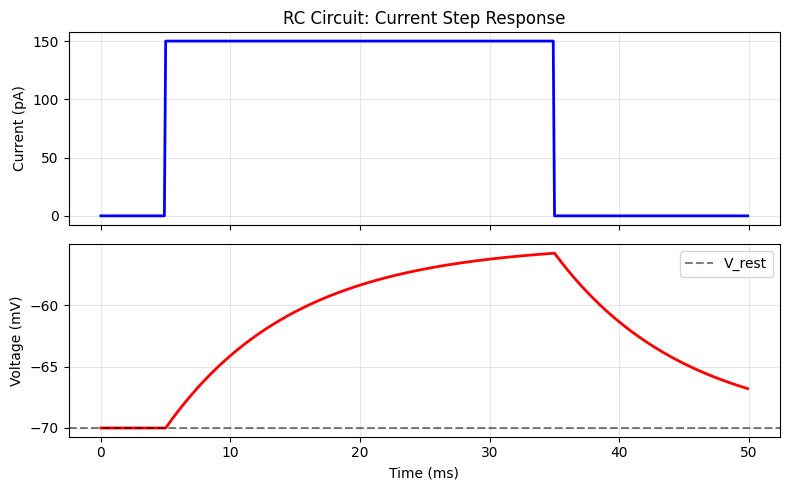

In [73]:
# Plot results
fig, axes = plt.subplots(2, 1, figsize=(8, 5), sharex=True)

axes[0].plot(time, I_app.to(u.pA), 'b', linewidth=2)
axes[0].set_ylabel('Current (pA)')
axes[0].set_title('RC Circuit: Current Step Response')
axes[0].grid(True, alpha=0.3)

axes[1].plot(time, V, 'r', linewidth=2)
axes[1].axhline(V_rest.to(u.mV).magnitude, ls='--', color='k', alpha=0.5, label='V_rest')
axes[1].set_xlabel('Time (ms)')
axes[1].set_ylabel('Voltage (mV)')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [74]:
# Verify the steady-state response
V_ss_expected = V_rest + R_m * 150.0 * u.pA
V_ss_observed = u.math.max(V)
print(f"\nSteady-state voltage:")
print(f"  Expected: {V_ss_expected}")
print(f"  Observed: {V_ss_observed}")
print(f"  Match: {u.math.allclose(V_ss_expected, V_ss_observed, atol=0.01 *u.mV)}")


Steady-state voltage:
  Expected: -55.0 * mvolt
  Observed: -55.746826171875 * mvolt
  Match: False


## Example: Ohm's Law Validation

Let's verify Ohm's law ($V = I R$) with different unit combinations:

In [75]:
# Test cases with different unit combinations
test_cases = [
    {"I": 100.0 * u.pA, "R": 100.0 * u.Mohm},
    {"I": 1.0 * u.nA, "R": 50.0 * u.Mohm},
    {"I": 0.5 * u.uA, "R": 10.0 * u.kohm},
    {"I": 10.0 * u.mA, "R": 1.0 * u.ohm},
]

print("Ohm's Law Validation (V = I × R):\n")
print(f"{'Current':<15} {'Resistance':<15} {'Voltage':<15}")
print("-" * 45)
for case in test_cases:
    I = case["I"]
    R = case["R"]
    V = I * R
    print(f"{str(I):<15} {str(R):<15} {str(V.to(u.mV)):<15}")

# Verify dimensional consistency
print("\nDimensional Analysis:")
I_test = 100.0 * u.pA
R_test = 100.0 * u.Mohm
V_test = I_test * R_test

print(f"  Current dimension: {I_test.dim}")
print(f"  Resistance dimension: {R_test.dim}")
print(f"  Voltage dimension: {V_test.dim}")
print(f"  \nExpected voltage dimension: {u.mV.dim}")
print(f"  Dimensions match: {V_test.dim == u.mV.dim}")

Ohm's Law Validation (V = I × R):

Current         Resistance      Voltage        
---------------------------------------------
100. * pamp     100. * Mohm     10. * mvolt    
1. * namp       50. * Mohm      50. * mvolt    
0.5 * uamp      10. * kohm      5. * mvolt     
10. * mamp      1. * ohm        10. * mvolt    

Dimensional Analysis:
  Current dimension: A
  Resistance dimension: m^2 kg s^-3 A^-2
  Voltage dimension: m^2 kg s^-3 A^-1
  
Expected voltage dimension: m^2 kg s^-3 A^-1
  Dimensions match: True


## Example: Spike Frequency Calculation

Calculate firing rate from inter-spike intervals:

In [76]:
# Simulated spike times
spike_times = np.array([10.5, 25.3, 39.8, 54.7, 69.2, 84.1]) * u.ms

print("Spike times:", spike_times)

Spike times: ArrayImpl([10.5, 25.29999924, 39.79999924, 54.70000076, 69.19999695,
           84.09999847], dtype=float32) * msecond


In [77]:
# Calculate inter-spike intervals (ISI)
isi = u.math.diff(spike_times)
print("\nInter-spike intervals:", isi)


Inter-spike intervals: ArrayImpl([14.79999924, 14.5     , 14.90000153, 14.49999619, 14.90000153],
          dtype=float32) * msecond


In [78]:
# Mean ISI and firing rate
mean_isi = u.math.mean(isi)
firing_rate = (1.0 / mean_isi).to(u.Hz)

print(f"\nMean ISI: {mean_isi}")
print(f"Firing rate: {firing_rate}")


Mean ISI: 14.720000267028809 * msecond
Firing rate: 67.93478393554688 * hertz


In [79]:
# Coefficient of variation (CV)
std_isi = u.math.std(isi)
cv = (std_isi / mean_isi)

print(f"\nISI variability:")
print(f"  Std ISI: {std_isi}")
print(f"  CV: {cv:.3f}")


ISI variability:
  Std ISI: 0.18330447375774384 * msecond
  CV: 0.012


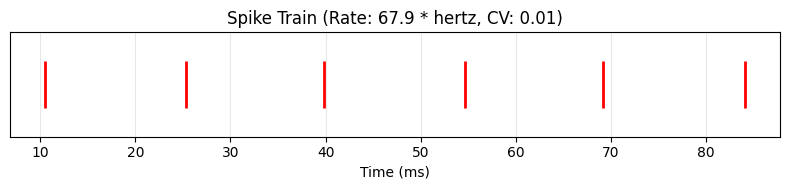

In [80]:
# Plot spike train
plt.figure(figsize=(8, 2))
plt.eventplot([spike_times.to(u.ms).magnitude], lineoffsets=0.5, colors='red', linewidths=2)
plt.yticks([])
plt.xlabel('Time (ms)')
plt.title(f'Spike Train (Rate: {firing_rate:.1f}, CV: {cv:.2f})')
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

## Working with Dimensionless Quantities

Some calculations produce dimensionless results. Use ``.to_decimal()`` to extract the numerical value:

In [81]:
# Ratio of voltages (dimensionless)
V1 = -50.0 * u.mV
V2 = -70.0 * u.mV
ratio = V1 / V2
print(f"V1 / V2 = {ratio}")
print(f"As decimal: {ratio:.4f}")

V1 / V2 = 0.7142857142857143
As decimal: 0.7143


In [82]:
# Time ratio
t_measured = 15.0 * u.ms
tau = 10.0 * u.ms
normalized_time = (t_measured / tau)
print(f"\nt / tau = {normalized_time}")


t / tau = 1.5


In [83]:
# For exponentials, ensure argument is dimensionless
decay_factor = u.math.exp(-normalized_time)
print(f"exp(-t/tau) = {decay_factor:.4f}")

exp(-t/tau) = 0.2231


In [84]:
# Percentage difference
V_expected = -65.0 * u.mV
V_measured = -62.0 * u.mV
percent_error = ((V_measured - V_expected) / V_expected * 100)
print(f"\nPercent error: {percent_error:.2f}%")


Percent error: -4.62%
